- even the "relative long trendency" is short/long, there must be a not-small thres to filter the noise
  - the base of "relative" is your trading trendency
  - TODO: find the measure of relative trendency
    - for daily 1m trade, the measure of relative trendency is measured by delta-price of 1d
- if the "relative long trendency" is short/long, there is no need to buy long/short

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tradebot1 import *
#import backtrader as bt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from momentum_trade_v2 import testing,testing_min
import pickle as pkl

In [3]:
from momentum_trade_v2 import get_data, compute_ma,compute_ema, plot_return

In [4]:
from pytz import timezone

## Testing historical period

In [5]:
#df_1d_60 = testing()

In [6]:
# with open('df_1d_60.pkl', "wb") as file:
#     pkl.dump(df_1d_60, file)

In [7]:
#plot_return(df_1d_60)

In [8]:
# 1d, 0, 0, 12, 1 = 1.03
df_1d_30 = testing(short_ticker="FNGD", long_ticker="FNGU", freq='1d', ma_func=compute_ma, start_testing_date = '2020-12-20', testing_length = 30, long_thres=0, short_thres=0, sf1=12, sf2=1)

HTTPError: 403 Client Error: Forbidden for url: https://paper-api.alpaca.markets/v2/calendar?start=2020-12-20&end=2022-05-29

<AxesSubplot:>

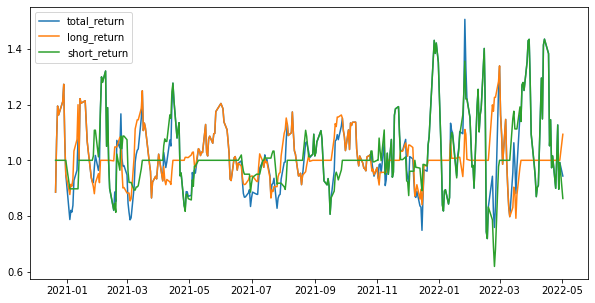

In [ ]:
figure_size=(10,5)
df_1d_30.plot(subplots=False, figsize=figure_size)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

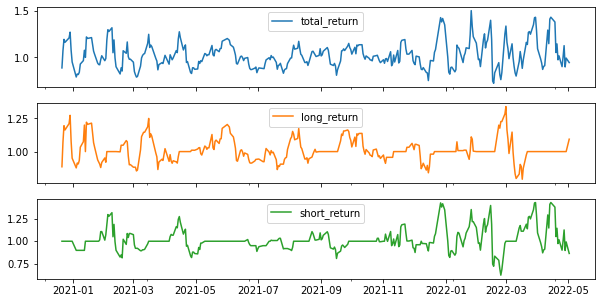

In [ ]:
figure_size=(10,5)
df_1d_30.plot(subplots=True, figsize=figure_size)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ts = df_1d_30['total_return']
ts_shift = ts - ts.shift()
model = ARIMA(ts, order=(2,1,2))
results = model.fit(disp=-1)
#plt.plot(df_log_shift)
#plt.plot(results.fittedvalues, color='red')

/home/dayu/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/dayu/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


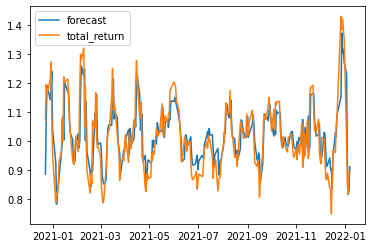

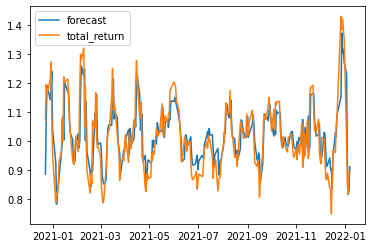

In [ ]:
results.plot_predict(1,264)

In [ ]:
# # 5m, 0, 0, 12, 1 = 1.004, 0.999results.plot_predict(1,264)

# # 5m, 2, 2, 12, 1 = 1.0008
# # 15m, 0, 0, 12, 1 = 1.0007

# df_1d_30 = testing_min(short_ticker="FNGD", long_ticker="FNGU", freq='15m', ma_func=compute_ma, start_testing_date = '2022-04-01',  long_thres=0, short_thres=0, sf1=12, sf2=1)

In [ ]:
# with open('df_1d_30_FNGDFNGU_longthres0_shortthres0_sf112_sf21.pkl', "wb") as file:
#     pkl.dump(df_1d_30, file)


In [ ]:
# with open('df_1d_30.pkl', "wb") as file:
#     pkl.dump(df_1d_30, file)

In [ ]:
#plot_return(df_1d_30, )

In [ ]:
# nyc = timezone('America/New_York')
# now = datetime.today().astimezone(nyc)
# today_str = datetime.today().astimezone(nyc).strftime('%Y-%m-%d')
# data = get_data(start='2020-04-20', end=today_str, interval='1d')

In [ ]:
# data.iloc[-1, :]

In [ ]:
# ma_dif = compute_ma(data['Close'].values, sf2=4, if_plot=True)